<a href="https://colab.research.google.com/github/mayayank95/HaN-Seg/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connection to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Configurations

In [ ]:
parent_dir = "drive/MyDrive/project/data/HaN-Seg/set_1/"

Impots

In [ ]:
pip install git+https://github.com/mhe/pynrrd.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mhe/pynrrd.git to /tmp/pip-req-build-ng_ju3pn
  Running command git clone --filter=blob:none --quiet https://github.com/mhe/pynrrd.git /tmp/pip-req-build-ng_ju3pn
  Resolved https://github.com/mhe/pynrrd.git to commit d7f1d0ced4aadb01cc160b16e2763d27e7e3d386
  Preparing metadata (setup.py) ... done
  Created wheel for pynrrd: filename=pynrrd-1.0.0-py2.py3-none-any.whl size=19886 sha256=7d25666b1e830495ca40f64ee0f31846f0d2157ab79d366590fa60787faa123c
  Stored in directory: /tmp/pip-ephem-wheel-cache-4iy0vh3a/wheels/0a/6a/aa/8167cf448d736b2ade3aeb53eebc105655818ad5e29e3d024b
Successfully built pynrrd


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import nrrd

#**Patient data** 

### Read csv and order to convenient format

In [ ]:
df_demographic = pd.read_csv(parent_dir+"patient_data.csv",header=None)
# preprocess to convenient format
df_demographic = df_demographic.iloc[:,0].str.split(';', expand=True)
# Set the first row as column names
df_demographic = df_demographic.set_axis(df_demographic.iloc[0], axis=1, copy=False)
# Remove the first row, as it is now the column names
df_demographic = df_demographic[1:]
df_demographic = df_demographic.set_index('Case')
df_demographic.sample(5)

,Gender (M/F),Age (years)
Case,,
case_18,M,69
case_39,M,74
case_19,F,42
case_09,M,67
case_35,M,76


### Basic statistics

In [ ]:
print(f"number of patients: {df_demographic.shape[0]}")

number of patients:42


In [ ]:
print(f"gender distribution:\n{np.round(df_demographic['Gender (M/F)'].value_counts()/df_demographic.shape[0],2)}")

gender distribution:
M    0.71
F    0.29
Name: Gender (M/F), dtype: float64


In [ ]:
df_demographic.dtypes

0
Gender (M/F)    object
Age (years)     object
dtype: object

In [ ]:
df_demographic.describe()

,Gender (M/F),Age (years)
count,42,42
unique,2,30
top,M,69
freq,30,4


### Numerical, and Categorical features



In [ ]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, case_01 to case_42
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender (M/F)  42 non-null     object
 1   Age (years)   42 non-null     object
dtypes: object(2)
memory usage: 1008.0+ bytes


We can see that we don't have null for both features. There is one categorical attribute that needs to be encoded to a numeric value and one numeric attribute that needs to be converted to the integer type.

In [ ]:
df_demographic['Age (years)'] = df_demographic['Age (years)'].astype(int)
label_encoder = LabelEncoder()
df_demographic['Gender (M/F)'] = label_encoder.fit_transform(df_demographic['Gender (M/F)'])

df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, case_01 to case_42
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender (M/F)  42 non-null     int64
 1   Age (years)   42 non-null     int64
dtypes: int64(2)
memory usage: 1008.0+ bytes


In [ ]:
df_demographic['Age (years)'].describe()

count    42.000000
mean     59.952381
std      11.435828
min      36.000000
25%      51.250000
50%      61.000000
75%      69.000000
max      79.000000
Name: Age (years), dtype: float64

In [ ]:
df_demographic['Gender (M/F)'].value_counts()

1    30
0    12
Name: Gender (M/F), dtype: int64

###  Data integrity

In [ ]:
df_demographic.describe().loc[['min', 'max'], 'Age (years)']
# checking for illogical values

min    36.0
max    79.0
Name: Age (years), dtype: float64

We can see we don't have outliers.

### Visualizing data distributions

In [ ]:
df_demographic.groupby('Gender (M/F)')['Age (years)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender (M/F),,,,,,,,
0,12.0,54.666667,11.586303,38.0,44.5,53.5,62.25,75.0
1,30.0,62.066667,10.853041,36.0,53.5,63.5,69.00,79.0


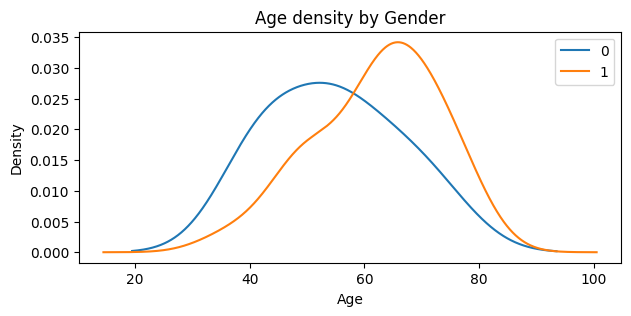

In [ ]:
df_demographic.groupby('Gender (M/F)')['Age (years)'].plot(kind='kde', figsize=(7, 3))
plt.legend(loc = 'upper right')
plt.title('Age density by Gender')
plt.xlabel('Age')
plt.show()
#1 - M, 0-F

We can see that the average age of females is lower than the age of males.

# **Imaging data**

### Understanding the header information
[coordinate systems](https://theaisummer.com/medical-image-coordinates/)
[anatomical-positions](https://www.istockphoto.com/vector/anatomical-positions-vector-illustration-scheme-of-superior-inferior-and-proximal-gm988467818-268011565)

In [ ]:
# one example
readdata_ct, header_ct = nrrd.read(parent_dir+"case_41/case_41_IMG_CT.nrrd")
print(readdata_ct.shape)
print(header_ct)

(1024, 1024, 197)
OrderedDict([('type', 'int'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([1024, 1024,  197])), ('space directions', array([[0.55859375, 0.        , 0.        ],
       [0.        , 0.55859375, 0.        ],
       [0.        , 0.        , 2.        ]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([-286. , -213. , -157.5]))])


space:
1. left - Sagittal plane - (from right towards left)
2. posterior - Coronal plane - front-back, In this view, we traverse either by looking in the eyes (anterior plane) or by looking in the back of a patient (posterior plane) (from anterior towards posterior)
3. superior - Axial plane - a slice near the head is referred to as superior compared to a slice closer to the feet, which is called inferior.(from inferior towards superior)
​
  


In [ ]:
print(readdata_mr.shape)
print(header)

(512, 512, 73)
OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([512, 512,  73])), ('space directions', array([[0.46880001, 0.        , 0.        ],
       [0.        , 0.46880001, 0.        ],
       [0.        , 0.        , 2.99999714]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([-115.375     , -154.88299561,  -35.99980164])), ('ITK_FileNotes', ''), ('ITK_original_direction', ''), ('ITK_original_spacing', ''), ('aux_file', ''), ('bitpix', '16'), ('cal_max', '0'), ('cal_min', '0'), ('datatype', '4'), ('descrip', ''), ('dim[0]', '3'), ('dim[1]', '512'), ('dim[2]', '512'), ('dim[3]', '73'), ('dim[4]', '1'), ('dim[5]', '1'), ('dim[6]', '1'), ('dim[7]', '1'), ('dim_info', '0'), ('intent_code', '0'), ('intent_name', ''), ('intent_p1', '0'), ('intent_p2', '0'), ('intent_p3', '0'), ('nifti_type', '1'), ('pixdim[0]', '0'), ('pixdim[1]', '0.4688'), ('pixdim[2]', '0.4688'

In [ ]:
type(readdata_ct)

numpy.ndarray

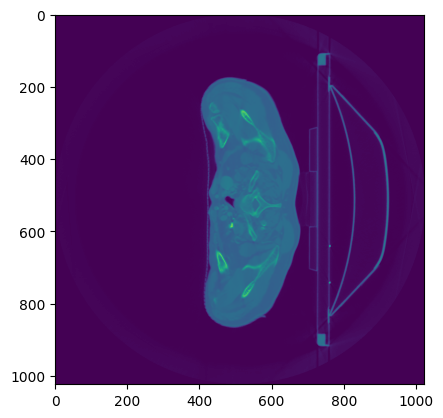

In [ ]:
plt.imshow(readdata_ct[:,:,50])

In [ ]:
readdata_mr, header_mr = nrrd.read(parent_dir+"case_42/case_42_IMG_MR_T1.nrrd")


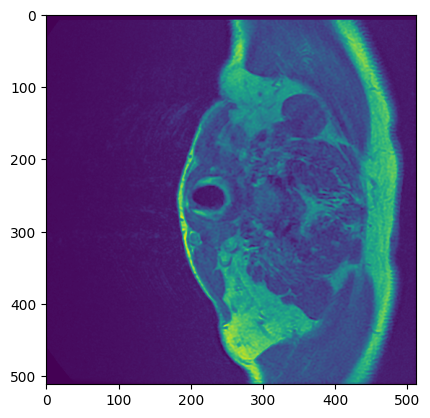

In [ ]:
plt.imshow(readdata[:,:,2])